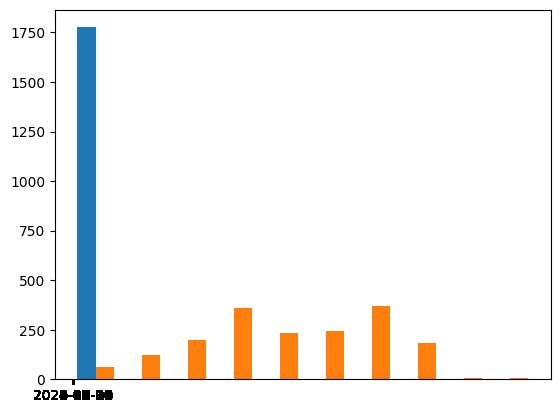

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Load data from the CSV file that only contains ridership data

data = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/combined_df.csv")
plt.hist(x = data, bins=10)
#plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

info = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/merged_file.csv")

division_data = info[info["division"]].groupby("incident_type", "date")
sns.lineplot(data=division_data, x="incident_type", y="date")
plt.xlabel("incident_type")
plt.ylabel("Date")
plt.show()

KeyError: "None of [Index(['A DIVISION', 'A DIVISION', 'A DIVISION', 'A DIVISION', 'A DIVISION',\n       'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION',\n       ...\n       'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION',\n       'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION', 'B DIVISION'],\n      dtype='object', length=1958)] are in the [columns]"